# Load the data

In [ ]:
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Read the data

In [ ]:
import pandas as pd
data=pd.read_csv("dataimmobilier.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data cleaning

Check whether it meets the normal distribution


 mu = 180921.20 and sigma = 79415.29



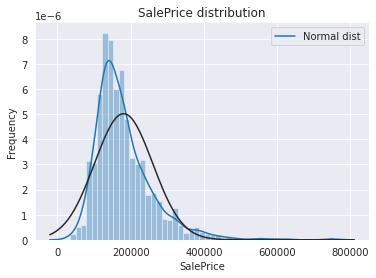

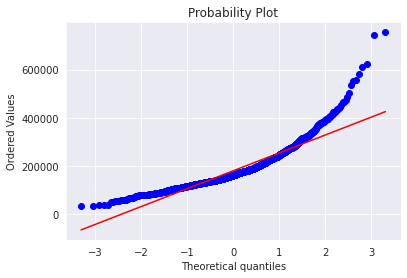

In [ ]:
# Draw the probability distribution diagram of Y
sns.distplot(data['SalePrice'], fit=norm);
plt.legend(['Normal dist'], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get the normal distribution parameters of Y
(mu, sigma) = norm.fit(data['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Draw QQ-plot diagram
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)


 mu = 12.02 and sigma = 0.40



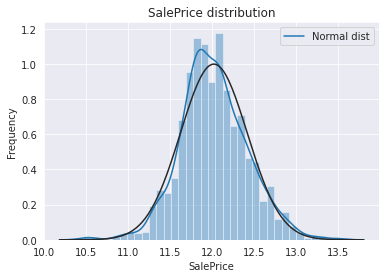

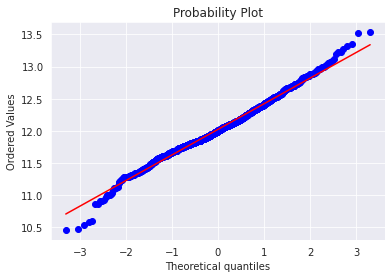

In [ ]:
#Normalization Y
data['SalePrice'] = np.log1p(data['SalePrice'])

# Draw a distribution map to check the new distribution
sns.distplot(data['SalePrice'], fit=norm);
plt.legend(['Normal dist'], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get new normal distribution parameters
(mu, sigma) = norm.fit(data['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Draw QQ-plot diagram
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

相关性

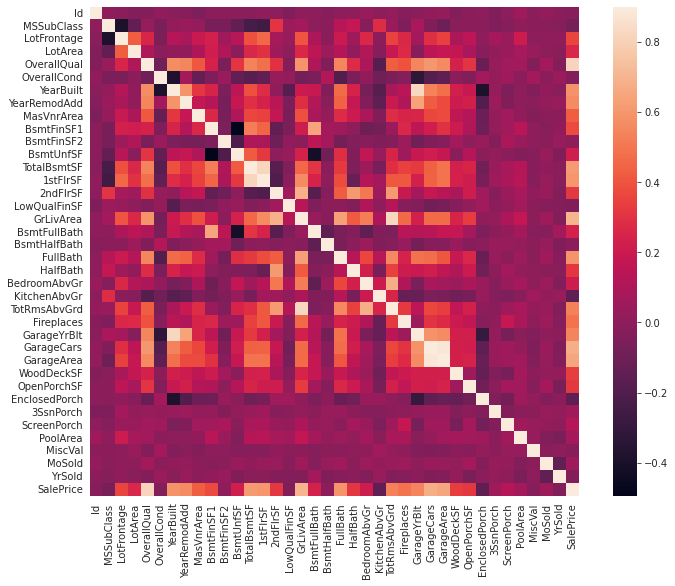

In [ ]:
# Use a heat map to show the correlation between each variable and Y
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Fill the nan data

Text(0.5, 1.0, 'Percent missing data by feature')

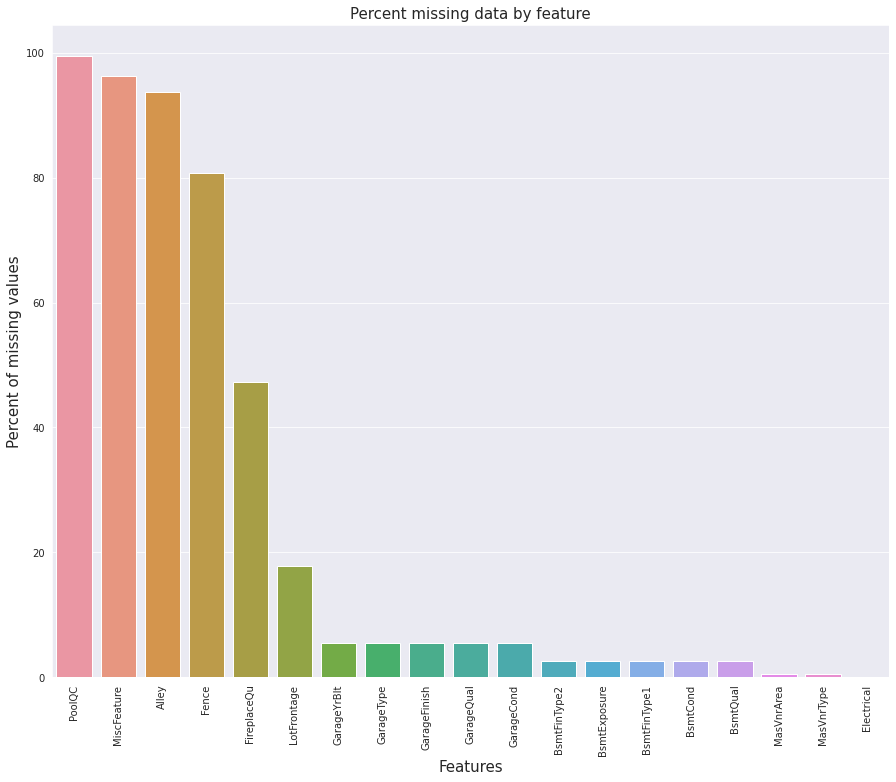

In [ ]:
# View missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

# Draw a histogram of missing values
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
missing_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

PoolQC, MiscFeature, Alley, Fence, FireplaceQu: The empty value in these variables means that the sample house does not contain facilities such as swimming pools and fences, so it is filled with None.


In [ ]:
data["PoolQC"] = data["PoolQC"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")

LotFrontage: The area of ​​the property connected to the street can be filled with the median of other sample items in the same community.




In [ ]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual, GarageCond: Garage series variable 1, which is the nominal type and is filled with None.

In [ ]:
for col in ('GarageYrBlt','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: basement series variable 2, which is the nominal type, filled with None

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType2','BsmtFinType1'):
    data[col] = data[col].fillna('None')

MasVnrArea, MasVnrType: A null value means that the sample house does not contain masonry veneer walls, so it is filled with 0 and None respectively.

In [ ]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

Electrical: Because there are only individual missing values ​​in these variables, the mode can be used to fill.

In [ ]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [ ]:
# Check again for missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio


Conversion of sequence type to numeric type
Variables such as FireplaceQu (fireplace quality), BsmtQual (basement height), GarageQual (garage quality), etc., although they are nominal variables of string type, they imply sequential information (such as quality, functional How much), it needs to be Label Encoding to convert it into an ordered number.

Feature engeniering

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('Neighborhood',
 'Heating',
 'SaleCondition',
 'Exterior1st',
 'BldgType',
 'HouseStyle',
 'MSZoning',
 'Foundation',
 'GarageType',
 'Condition1',
 'Condition2',
 'SaleType',
 'MasVnrType','GarageYrBlt')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))

Drop the duplicated data

In [ ]:
data.duplicated()
data.duplicated().sum()
data=data.drop_duplicates()

In [ ]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

Normalize

In [ ]:
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
Condition2,13.158307
LotArea,12.195142
3SsnPorch,10.293752
Heating,9.844972
LowQualFinSF,9.002080
LandSlope,4.808735
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)

There are 73 skewed numerical features to Box Cox transform


In [ ]:
no_numeric_feats = data.dtypes[data.dtypes == "object"].index
no_numeric_feats

Index(['LandContour', 'Utilities', 'LotConfig', 'RoofStyle', 'RoofMatl',
       'Exterior2nd', 'Electrical', 'MiscFeature'],
      dtype='object')

One hot encoding

In [ ]:
data = pd.get_dummies(data)
print(data.shape)

(1460, 124)


In [ ]:
'''
numeric_features = data.dtypes[data.dtypes != 'object'].index
data[numeric_features] = data[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# After standardization, the mean value of each feature becomes 0, so you can directly replace the missing value with 0
data[numeric_features] = data[numeric_features].fillna(0)
'''

In [ ]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0.730463,2.055642,1.540963,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.055642,1.194318,1.194318,0.000000,2.055642,2.440268,1.820334,14.187527,14.187527,3.128239,0.730463,8.059126,1.194318,1.820334,1.194318,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.000000,7.483296,11.692623,0.730463,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,0.730463,6.426513,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.000000,0.0,0.0,1.540963,1.820334,0.000000,0.730463,1.194318,2.602594,1.820334,3.156009,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,1.194318,0.000000,1.540963,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,4.137711,0.730463,1.194318,0.000000,1.194318,2.259674,2.440268,14.145138,14.145138,2.602594,1.194318,0.000000,1.540963,1.820334,0.730463,1.194318,1.820334,0.730463,0.000000,12.062832,2.259674,0.000000,8.897844,12.792276,0.730463,0.000000,0.730463,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,2.055642,0.730463,5.744420,1.194318,1.194318,10.062098,2.055642,2.055642,1.194318,9.010206,0.000000,0.000000,0.000000,0.0,0.0,1.540963,1.820334,0.000000,1.820334,0.730463,2.602594,1.820334,3.140516,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1.540963,2.055642,1.540963,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.055642,1.194318,1.194318,0.000000,2.055642,2.440268,1.820334,14.184404,14.185966,3.128239,0.730463,7.646538,1.194318,1.820334,1.194318,1.194318,1.820334,1.194318,1.194318,10.200343,2.259674,0.000000,9.917060,11.892039,0.730463,0.000000,0.730463,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,2.055642,0.730463,6.382451,1.194318,1.194318,10.775536,2.055642,2.055642,1.194318,0.000000,5.053371,0.000000,0.000000,0.0,0.0,1.540963,1.820334,0.000000,2.602594,1.194318,2.602594,1.820334,3.163719,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,1.820334,2.259674,1.540963,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.259674,1.1943

ID is the feature which can't influence the data

In [ ]:
data.drop("Id", axis = 1, inplace = True)

Split the data

In [ ]:
import tensorflow as tf

In [ ]:
y=data.SalePrice
X=data.drop(["SalePrice"],axis=1)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define the model

## XGB

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_xgb.fit(x_train, y_train)

XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
             min_child_weight=1.7817, n_estimators=2200, nthread=-1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571, silent=1,
             subsample=0.5213)

In [ ]:
preds=model_xgb.predict(x_test)
from sklearn import metrics
metrics.r2_score(y_test,preds)

0.712716798999385

Feature importance

In [ ]:
model_xgb.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09213696, 0.        ,
       0.08812898, 0.0693363 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07398991, 0.        , 0.        , 0.08286503,
       0.06259824, 0.        , 0.        , 0.07841617, 0.        ,
       0.        , 0.07280754, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.07511964, 0.        ,
       0.08472624, 0.        , 0.        , 0.07907695, 0.0743259 ,
       0.        , 0.06647215, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'Neighborhood', 'Condition1',
       ...
       'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'Electrical_SBrkr', 'MiscFeature_Gar2',
       'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC'],
      dtype='object', length=122)

In [ ]:
Feature_importance=pd.DataFrame()

In [ ]:
Feature_importance["Feature Importance"]=model_xgb.feature_importances_


In [ ]:
Feature_importance.index=X.columns

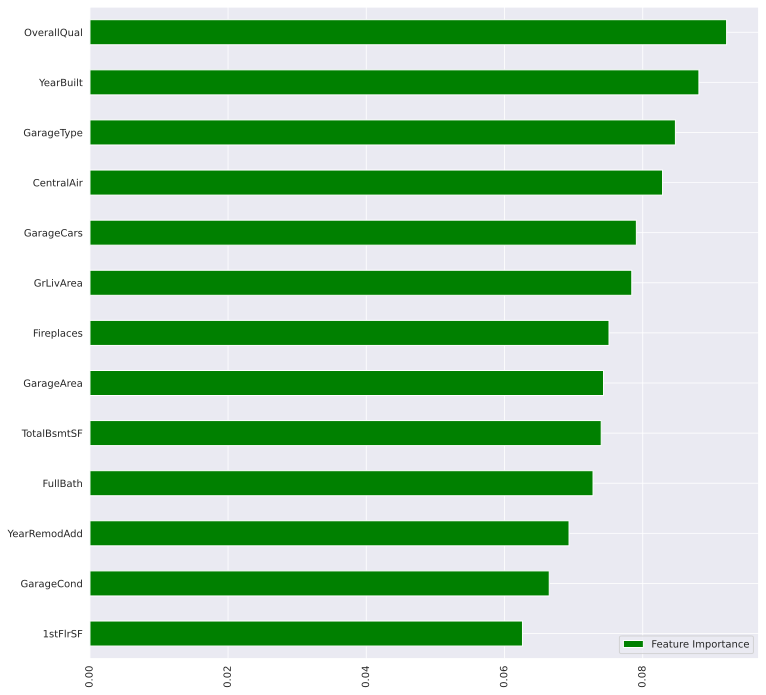

In [ ]:
Feature_importance[Feature_importance["Feature Importance"] !=0 ].sort_values("Feature Importance").plot(kind="barh",figsize=(12,12), color='g')
plt.xticks(rotation=90)
plt.show()

In [ ]:

'''choose_cols =Feature_importance[Feature_importance["Feature Importance"] !=0 ].index.tolist()
choose_cols.append("SalePrice")
choose_data = data[choose_cols].copy()
y=choose_data.SalePrice
X=choose_data.drop(["SalePrice"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(x_train, y_train)
preds=model_xgb.predict(x_test)
from sklearn import metrics
metrics.r2_score(y_test,preds)'''

0.7057953625225492

Hyperparameter tuning

In [ ]:
from  sklearn.model_selection import GridSearchCV
def modelfit(model,x_train,y_train,useTrainCV=True,cv_folds=5,early_stopping_rounds=50):
  model.fit(x_train,y_train,eval_metric="rmse")
  train_predictions=model.predict(x_test)
  print('ce model est ')
  print("r2_score : %.4g" % metrics.r2_score(y_test,train_predictions))

In [ ]:
xgb1=XGBRegressor(base_score=0.5,colsample_bylevel=1,colsample_bytree=0.4603, gamma=0.0,
                             learning_rate=0.05, max_depth=3,max_delta_step=0,
                             min_child_weight=1.7817, n_estimators=2200,missing=None,
                             reg_alpha=0.4640, reg_lambda=0.8571,nthread=-1,objective='reg:linear',
                             subsample=0.5213, silent=1,seed=1850,scale_pos_weight=1,
                             random_state =7)
modelfit(xgb1,x_train,y_train)

ce model est 
r2_score : 0.8576


In [ ]:
param_test1={
    'max_depth':range(3,10,2),
    "min_child_weight":range(1,6,2)
}
gsearch1=GridSearchCV(estimator=XGBRegressor(base_score=0.5,colsample_bylevel=1,colsample_bytree=0.4603, gamma=0.0,
                             learning_rate=0.05,max_delta_step=0, n_estimators=2200,missing=None,
                             reg_alpha=0.4640, reg_lambda=0.8571,nthread=-1,objective='reg:linear',
                             subsample=0.5213, silent=1,seed=1850,scale_pos_weight=1,
                             random_state =7),param_grid=param_test1,scoring="r2",cv=5)
gsearch1.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(colsample_bytree=0.4603, gamma=0.0,
                                    learning_rate=0.05, n_estimators=2200,
                                    nthread=-1, random_state=7, reg_alpha=0.464,
                                    reg_lambda=0.8571, seed=1850, silent=1,
                                    subsample=0.5213),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='r2')

In [ ]:
gsearch1.cv_results_

{'mean_fit_time': array([0.7208106 , 0.7088511 , 0.70063963, 0.77720141, 0.75376439,
        0.74859505, 0.80011163, 0.76623592, 0.75313845, 0.80253911,
        0.77418814, 0.75864201]),
 'mean_score_time': array([0.01107621, 0.01135674, 0.01159492, 0.01312633, 0.01241932,
        0.01235685, 0.01391525, 0.01283016, 0.01256652, 0.01374421,
        0.01346383, 0.01264997]),
 'mean_test_score': array([0.85047234, 0.85113044, 0.85087349, 0.85096149, 0.85233923,
        0.85143059, 0.85142868, 0.85271887, 0.8517176 , 0.85143154,
        0.85273327, 0.85176202]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
              mask=[False, False, False, False, False, False, False, False,
                    Fal

In [ ]:
gsearch1.best_params_

{'max_depth': 9, 'min_child_weight': 3}

In [ ]:
gsearch1.best_score_

0.8527332742551004

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

y=data.SalePrice
X=data.drop(["SalePrice"],axis=1)
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8882858997233598

In [ ]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(reg, prefit=True)
X_new = model.transform(X)
X_new.shape

(1460, 30)

Feature importance

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8277597806182089

## Lasso

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=13)

alpha_range = np.arange(0,1,0.05)
param_grid = {'alpha':alpha_range}
lasso = linear_model.Lasso()
#Grid Search CV
lasso_search = GridSearchCV(lasso,param_grid)
lasso_search.fit(X_train,y_train)
for result in lasso_search.cv_results_:
	print(result, lasso_search.cv_results_[result])
print(lasso_search.best_score_)
print(lasso_search.best_params_)
print(lasso_search.best_estimator_)


mean_fit_time [0.16048083 0.00790572 0.01493249 0.00927529 0.00778041 0.00754771
 0.00756631 0.00879979 0.0084456  0.01504135 0.0075573  0.01367936
 0.00747166 0.01005173 0.01688886 0.01673632 0.01460295 0.00762777
 0.00743484 0.01269479]
std_fit_time [1.43838657e-02 5.38338381e-05 3.88830840e-03 3.03157601e-03
 2.71655498e-04 1.48747714e-04 1.58263366e-04 2.41432416e-03
 1.61169743e-03 3.84651820e-03 8.25931788e-05 3.18633385e-03
 1.26038317e-04 5.32517930e-03 4.76660958e-04 1.90530632e-04
 1.80226483e-03 7.05542413e-05 8.99645268e-05 4.62932790e-03]
mean_score_time [0.00815673 0.00445113 0.00720243 0.00440588 0.00489407 0.00433197
 0.00430923 0.00438542 0.00474563 0.01022568 0.00433702 0.00603251
 0.00425358 0.00470223 0.00870018 0.009377   0.00907125 0.00432425
 0.00428391 0.00689683]
std_score_time [1.60951574e-03 9.01655567e-05 2.26236721e-03 7.96530176e-05
 9.89098266e-04 9.63046513e-05 1.11190001e-05 6.44304584e-05
 8.27161305e-04 2.55277148e-03 7.14652125e-05 1.97619555e-03
 2.